## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

# Descriptive Statistics Review

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [224]:
diamonds = pd.read_csv('/Users/bert/Desktop/dataV2-labs/module-2/M2-mini-project1/diamonds.csv').drop(['Unnamed: 0'], axis=1)

#.drop(['Unnamed: 0'], axis=1) --> this remove the column with the index. 
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [225]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [ ]:
'''
* We can see for each diamond the carat of the stone (= weight of the diamond) with min. (0.2 & max 5.01) --> here we have small diamonds
* Here we can also see how's the cut of the diamond is? (5 index columns where Ideal is the best and Premium second best. and good is just average.) If we only look to these 5 we have pretty good quality of diamonds. 
* The color is also important here we have 2 not so good qualities and 3 very good qualties just under the best quality. 
    (J --> D) --> D is the best quality and J is the worst!
* Clarity of these 5 stones is not so good if take a look to the codebook. We can say that those stones are average.  
* Depth: 
* Table: 
* Price: price of a diamond depends on a combination of several things. (Carat, Cut, Color, Clarity, Depth and Table)
* X: This represents the length of the diamond in mm of these 5 the range is between 3.89 and 4.34
* Y: This represenets the width of the diamond in mm of these 5 the range is between 3.84 and 4.45
* Z: This represents the depth of the diamond in mm of these 5 the range is between 2.31 and 2.75 

Was I expect thse variables? 
I would expect there was a larger difference in the price range. 
I was also expecting to see a relation between the values  Y in comparison with Table but at first glance we don't see much. 
I also thought that on the basis of 5 records, it was impossible to draw a conclusion. 

'''

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [226]:
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [227]:
def clarity_label (row): 
    if row['clarity'] == "I1": 
        return 0 
    if row['clarity'] == "SI2":
        return 1
    if row['clarity'] == "SI1":
        return 2
    if row['clarity'] == "VS2":
        return 3
    if row['clarity'] == "VS1":
        return 4
    if row['clarity'] == "VVS2":
        return 5
    if row['clarity'] == "VVS1":
        return 6
    if row['clarity'] == "IF":
        return 7

diamonds['clarity_scale'] = diamonds.apply(lambda row: clarity_label(row), axis=1)
diamonds.head()

#Comments: First I've made a function to specify every new variable. After I completed my function I used the 'Apply' method to the DataFrame and I used a lambda to iterate over all the rows. --> axis=1 means here in the apply function --> Apply function to each row. 

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [228]:
def color_label (row): 
    if row['color'] == "J": 
        return 0 
    if row['color'] == "I":
        return 1
    if row['color'] == "H":
        return 2
    if row['color'] == "G":
        return 3
    if row['color'] == "F":
        return 4
    if row['color'] == "E":
        return 5
    if row['color'] == "D":
        return 6

diamonds['color_scale'] = diamonds.apply(lambda row: color_label(row), axis=1)
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [229]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x              53940 non-null  float64
 8   y              53940 non-null  float64
 9   z              53940 non-null  float64
 10  clarity_scale  53940 non-null  int64  
 11  color_scale    53940 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


In [230]:
diamonds.shape

(53940, 12)

In [ ]:
"""
If we compare the info() method to shape() method we can see that number of rows identical and that is also what we expect. 
"""

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [231]:
#Here I change the datatype for a price because a price is not always an integer. 
diamonds.astype({'price': 'float64'}).dtypes

carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price            float64
x                float64
y                float64
z                float64
clarity_scale      int64
color_scale        int64
dtype: object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [232]:
diamonds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80
clarity_scale,53940.0,3.051020,1.647136,0.0,2.00,3.00,4.00,7.00
color_scale,53940.0,3.405803,1.701105,0.0,2.00,3.00,5.00,6.00


In [ ]:
"""
Here we see quick several statistical definitions. 
So we can have a quick impression of the data. 
"""

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [233]:
x_null = diamonds[diamonds['x'] == 0]
y_null = diamonds[diamonds['y'] == 0]
z_null = diamonds[diamonds['z'] == 0]
z_null

#I have used count to count the different sets of the missing values. 
# x = 8 --> Everywhere where x == 0 z is also == 0 but there is one value where y has value
# y = 7 --> Everywhere where y == 0 also x & z == 0 
# z = 20 --> sometimes there is a value for x & y where z is equal to 0

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,1,4
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,2
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,3,3
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,4,3
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,1,2


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [234]:
def calculate_z (row):
    if row['z'] > 0: 
        return row['z']
    elif row['z'] == 0 and row['x'] != 0 and row['y'] != 0:
        som = row['x']+row['y'] 
        return row['depth']*som/200




**Apply it just to the rows with incorrect values**

In [235]:
diamonds['z'] = diamonds.apply(lambda row: calculate_z(row), axis=1)
diamonds.head(50)


,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,0
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,6,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,2,2
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,3,5
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,4,2


If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [236]:
#diamonds['z'].isnull().sum()

def calculate_x (row):
    if row['x'] > 0: 
        return row['x']


diamonds['x'] = diamonds.apply(lambda row: calculate_x(row), axis=1)

#This is the formula to check if there are any NaN values an as you can see, we have 8
#Thanks to my previous formula I don't need to change anything. 

In [237]:
def calculate_y (row):
    if row['y'] > 0: 
        return row['y']

diamonds['y'] = diamonds.apply(lambda row: calculate_y(row), axis=1)

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [238]:
diamonds.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.20,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.00,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.00,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.00,950.00,2401.00,5324.25,18823.00
x,53932.0,5.732007,1.119670,3.73,4.71,5.70,6.54,10.74
y,53933.0,5.735270,1.140339,3.68,4.72,5.71,6.54,58.90
z,53932.0,3.540265,0.702667,1.07,2.91,3.53,4.04,31.80
clarity_scale,53940.0,3.051020,1.647136,0.00,2.00,3.00,4.00,7.00
color_scale,53940.0,3.405803,1.701105,0.00,2.00,3.00,5.00,6.00


In [ ]:
#test = diamonds[diamonds['z'] > 20 ]
#test
#This was just a random test of me. 

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [239]:
check_nan = diamonds.isnull().sum()
check_nan

carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price            0
x                8
y                7
z                8
clarity_scale    0
color_scale      0
dtype: int64

In [240]:
#Here we see that there are 8 NaN value in the x & z column and 7 in the y-column. 
#I drop those columns because I need to calculate with those mayby... 

diamonds2 = diamonds[diamonds['x'].notnull()]
check_nan = diamonds2.isnull().sum()
check_nan
len(diamonds2)

53932

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [241]:
diamonds2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53932.0,0.797879,0.473986,0.20,0.40,0.70,1.04,5.01
depth,53932.0,61.749336,1.432514,43.00,61.00,61.80,62.50,79.00
table,53932.0,57.457029,2.234064,43.00,56.00,57.00,59.00,95.00
price,53932.0,3932.136079,3988.734835,326.00,949.75,2401.00,5324.00,18823.00
x,53932.0,5.732007,1.119670,3.73,4.71,5.70,6.54,10.74
y,53932.0,5.735254,1.140343,3.68,4.72,5.71,6.54,58.90
z,53932.0,3.540265,0.702667,1.07,2.91,3.53,4.04,31.80
clarity_scale,53932.0,3.051101,1.647109,0.00,2.00,3.00,4.00,7.00
color_scale,53932.0,3.405789,1.701165,0.00,2.00,3.00,5.00,6.00


In [ ]:
#We see that the count has changed --> there is a decrease of 8 rows but that is because we drop the NaN values. 
#Min in x, y, z is not 0 anymore. 
#Price label has a very large standard variation. 

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [242]:
quantile_75 = diamonds2['price'].quantile(.75)
diamonds_outliner = diamonds2[diamonds['price']> quantile_75]
diamonds_outliner
#Here we see that there are more than 13.481 prices above our 75 percentile.

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
12765,1.07,Ideal,E,SI2,62.2,55.0,5325,6.54,6.58,4.08,1,5
12766,1.11,Ideal,H,SI1,60.6,59.0,5325,6.75,6.71,4.08,2,2
12767,1.14,Premium,G,SI1,62.2,58.0,5326,6.64,6.70,4.15,2,3
12768,1.07,Premium,H,VS2,62.1,59.0,5327,6.52,6.56,4.06,3,2
12769,1.33,Very Good,J,SI1,64.0,53.0,5327,6.93,7.01,4.46,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,2,2
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,1,3
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,7,3
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,2,3


Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

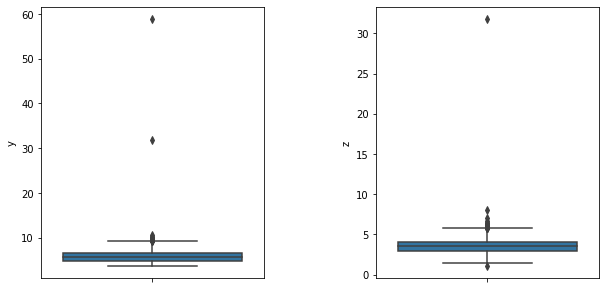

In [243]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds2.y, ax=ax[0])
sns.boxplot(y=diamonds2.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [245]:
diamonds2_filter = diamonds2[(diamonds['z'] > 10) ]
diamonds2_filter

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,4,5


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [248]:
diamonds2.loc[48410,'z']=0

diamonds2['z'] = diamonds2.apply(lambda row: calculate_z(row), axis=1)

Let's check if we actually corrected the outlier.

In [249]:
diamonds2.loc[48410]

carat                 0.51
cut              Very Good
color                    E
clarity                VS1
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                  3.17343
clarity_scale            4
color_scale              5
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [ ]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [250]:
diamonds2_filter_y = diamonds2[(diamonds['y'] > 10) ]
diamonds2_filter_y

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,4,5


In [251]:
diamonds2.loc[24067,'y']=0
diamonds2.loc[49189,'y']=0

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_scale,color_scale
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,0.00,8.06,1,2
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,0,0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,0.00,5.12,4,5


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [252]:
def calculate_y2 (row):
    if row['y'] > 0: 
        return row['y']
    elif row['y'] == 0 and row['x'] != 0 and row['z'] != 0:
        num1 = row['z']*200
        num2 = row['x']*row['depth']
        num3 = num1 - num2 
        num4 = num3/row['depth']
        return num4

diamonds2['y'] = diamonds2.apply(lambda row: calculate_y2(row), axis=1)

In [254]:
var_one = diamonds2.loc[24067,'y']
var_two = diamonds2.loc[49189,'y']

11.41957928802589

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

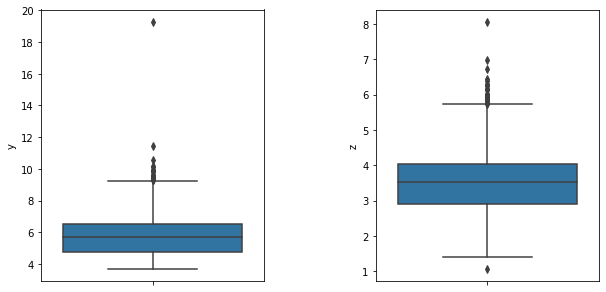

In [255]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds2.y, ax=ax[0])
sns.boxplot(y=diamonds2.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [ ]:
#Indeed it make more sense and the readability is better than in the previous. 
#We can see more clear through the dataset and se better the distribution. 
#Personally I would choose for another boxplot that have better readability. (Pxplot)

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [ ]:
#your code here